# Init Step

## import library

In [40]:
import tensorflow as tf
import keras as K
from keras.preprocessing.image import ImageDataGenerator
from pathlib import Path
import os
import pathlib
import utils

## variables

In [41]:
height, width = 125, 200
fps = 4
n_classes = 9
# savePath = "./data/cropHand_fps4/"
splitedFolder = "canny_fps4_splited_dataset"



# Preprocessing of images dataset

In [42]:
import os
cwd = os.getcwd()
print("current dir: {}".format(cwd))

current dir: c:\Users\mkhung6\Desktop\FYP\handGesture_FYP\model


In [43]:
# directory of the images dataset
base_dir = Path('../data')
data_dir = base_dir/ splitedFolder
train_dir = data_dir/'train'
val_dir = data_dir/'val'
test_dir = data_dir/'test'

# variable for model parameter 
n_epochs = 20
n_train_samples = utils.count_jpgs(train_dir)
n_val_samples = utils.count_jpgs(val_dir)
batch_size = 32

In [44]:
# data augmentation for the training set
train_datagen = ImageDataGenerator(rescale=1./255,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   horizontal_flip=False,
                                   vertical_flip=False,
                                   brightness_range=[0.8, 1.2],
                                   fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(height,width))
val_generator = train_datagen.flow_from_directory(val_dir, target_size=(height,width))

test_datagen = ImageDataGenerator(rescale=1./255) #use the original image for testing
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(height,width))

Found 7924 images belonging to 9 classes.
Found 2643 images belonging to 9 classes.
Found 2630 images belonging to 9 classes.


In [45]:
import utils
from keras.applications import VGG16
# load pretrained model and weights
conv_layers = VGG16(weights = 'imagenet', include_top=False, input_shape=(height,width,3))
conv_layers.trainable = False
print('per-trained model has been loaded')
conv_layers.summary()

per-trained model has been loaded
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 125, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 125, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 125, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 62, 100, 64)       0         
                                                                 
 block2_conv1 (Conv2D)       (None, 62, 100, 128)      73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 62, 100, 128)      147584    
                                                                 
 block2_pool (MaxPooling2D)

In [46]:
# pretraind model
model = K.models.Sequential()
model.add(conv_layers)
model.add(K.layers.Flatten())

# new layers
model.add(K.layers.Dense(2048, activation='relu')) 
model.add(K.layers.Dropout(0.5)) # dropout layer to reduce overfitting
model.add(K.layers.Dense(2048, activation='relu'))
model.add(K.layers.Dropout(0.5))

model.add(K.layers.Dense(n_classes, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 6, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 9216)              0         
                                                                 
 dense_6 (Dense)             (None, 2048)              18876416  
                                                                 
 dropout_4 (Dropout)         (None, 2048)              0         
                                                                 
 dense_7 (Dense)             (None, 2048)              4196352   
                                                                 
 dropout_5 (Dropout)         (None, 2048)              0         
                                                                 
 dense_8 (Dense)             (None, 9)                

In [47]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(train_generator,
                    steps_per_epoch=n_train_samples/batch_size,
                    epochs=n_epochs,
                    validation_data=val_generator,
                    validation_steps=n_val_samples/batch_size,
                    verbose=2,
                    shuffle=True,
                    )

Epoch 1/20
247/247 - 301s - loss: 0.9822 - acc: 0.6952 - val_loss: 0.1724 - val_acc: 0.9531 - 301s/epoch - 1s/step
Epoch 2/20
247/247 - 297s - loss: 0.3541 - acc: 0.8791 - val_loss: 0.0820 - val_acc: 0.9818 - 297s/epoch - 1s/step
Epoch 3/20
247/247 - 297s - loss: 0.3661 - acc: 0.8751 - val_loss: 0.1422 - val_acc: 0.9671 - 297s/epoch - 1s/step
Epoch 4/20
247/247 - 302s - loss: 0.3590 - acc: 0.8747 - val_loss: 0.1023 - val_acc: 0.9781 - 302s/epoch - 1s/step
Epoch 5/20
247/247 - 299s - loss: 0.3184 - acc: 0.8907 - val_loss: 0.0357 - val_acc: 0.9943 - 299s/epoch - 1s/step
Epoch 6/20
247/247 - 299s - loss: 0.2985 - acc: 0.8929 - val_loss: 0.0359 - val_acc: 0.9890 - 299s/epoch - 1s/step
Epoch 7/20
247/247 - 305s - loss: 0.2872 - acc: 0.8971 - val_loss: 0.0455 - val_acc: 0.9868 - 305s/epoch - 1s/step
Epoch 8/20
247/247 - 297s - loss: 0.2762 - acc: 0.9030 - val_loss: 0.0440 - val_acc: 0.9883 - 297s/epoch - 1s/step
Epoch 9/20
247/247 - 300s - loss: 0.2857 - acc: 0.8990 - val_loss: 0.0516 - val_

In [48]:
model.save(splitedFolder + ".h5")

c:\Users\mkhung6\AppData\Local\anaconda3\envs\mediapipe\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# show the accuracy of the model

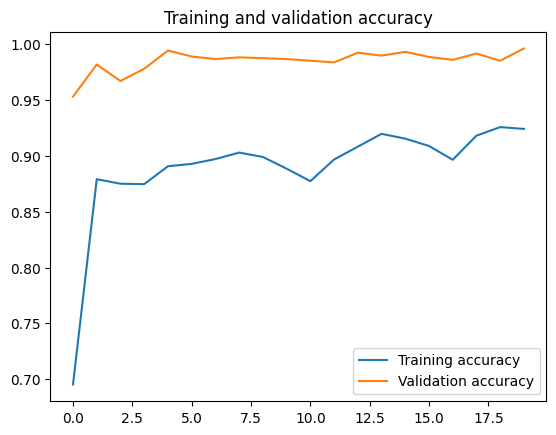

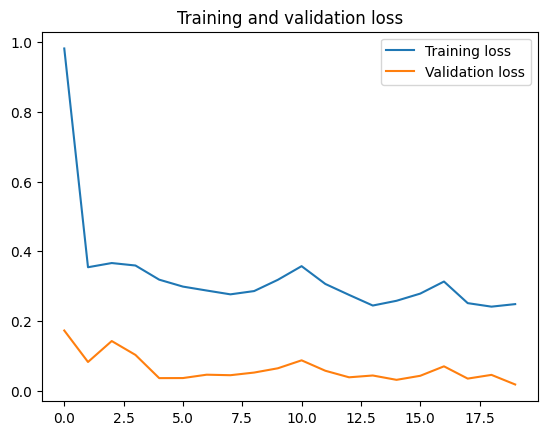

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [50]:
import utils
import json
class_indices = train_generator.class_indices
class_indices = {v: k for k, v in class_indices.items()}
print(class_indices)
config = {
        'indices': class_indices, 
        'input_size': (height, width)
    }
fp = splitedFolder + '.json'
with open(fp, 'w', encoding='UTF-8') as f:
    json.dump(config, f,ensure_ascii=False)

{0: 'ChanDingYin', 1: 'HuoYanYin', 2: 'MiTuoDingYin', 3: 'Retsu', 4: 'Rin', 5: 'TaiJiYin', 6: 'Zai', 7: 'Zen', 8: 'ZhiJiXiangYin'}


In [51]:
import numpy as np
from sklearn.metrics import confusion_matrix
#test the accuracy on test set
cwd = os.getcwd()
print("current dir: {}".format(cwd))

model = tf.keras.models.load_model(splitedFolder+".h5")
n_test_set = utils.count_jpgs(test_dir)
_, test_acc = model.evaluate(test_generator, steps=n_test_set/batch_size)
print('test acc: {:.4f}'.format(test_acc))

#calculate the confusion matrix of the model on test set
y_true = test_generator.classes
# Use the model to predict the labels of the test set
y_pred = model.predict(test_generator, steps=n_test_set/batch_size)
# Convert predictions to label indices
y_pred = np.argmax(y_pred, axis=1)

# Calculate the confusion matrix of prediction and actual class
cm = confusion_matrix(y_true, y_pred)

print(cm)



current dir: c:\Users\mkhung6\Desktop\FYP\handGesture_FYP\model
82/82 [==============================] - 66s 797ms/step - loss: 0.0067 - acc: 0.9981
test acc: 0.9981
82/82 [==============================] - 64s 782ms/step
[[27 35 41 37 26 34 37 27 33]
 [38 48 41 30 30 34 37 42 38]
 [33 45 38 38 28 41 28 30 47]
 [30 37 35 27 22 37 18 19 36]
 [38 29 30 17 18 34 28 16 25]
 [39 38 45 25 28 49 30 42 46]
 [20 37 38 33 24 27 28 31 25]
 [27 38 24 28 29 40 19  9 33]
 [46 31 37 25 31 46 34 33 36]]


In [52]:
import utils
import json
import pandas as pd
class_indices = train_generator.class_indices
class_indices = {v: k for k, v in class_indices.items()}
# hist_df = pd.DataFrame(history.history)

config = {
        'indices': class_indices, 
        'input_size': (height, width),
        'confusion_matrix': np.array2string(cm),
        'test_acc': test_acc,
        'history':history.history
        
    }

fp = splitedFolder + '.json'
with open(fp, 'w', encoding='UTF-8') as f:
    json.dump(config, f,ensure_ascii=False)
    # hist_df.to_json(f)
    